In [ ]:
import torch.nn.functional as F

class ThirdModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        self.fc1 = nn.Linear(7 * 7 * 32, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x = F.max_pool2d(x1, 2)
        
        x2 = F.relu(self.conv2(x))
        x = F.max_pool2d(x2, 2)
        
        x = x.view(x.size(0), -1) 
        
        x3 = F.relu(self.fc1(x))
        x = F.elu(self.fc2(x3))
        
        x = F.relu(self.fc3(x + x3))
        x = self.fc4(x)
        
        return x


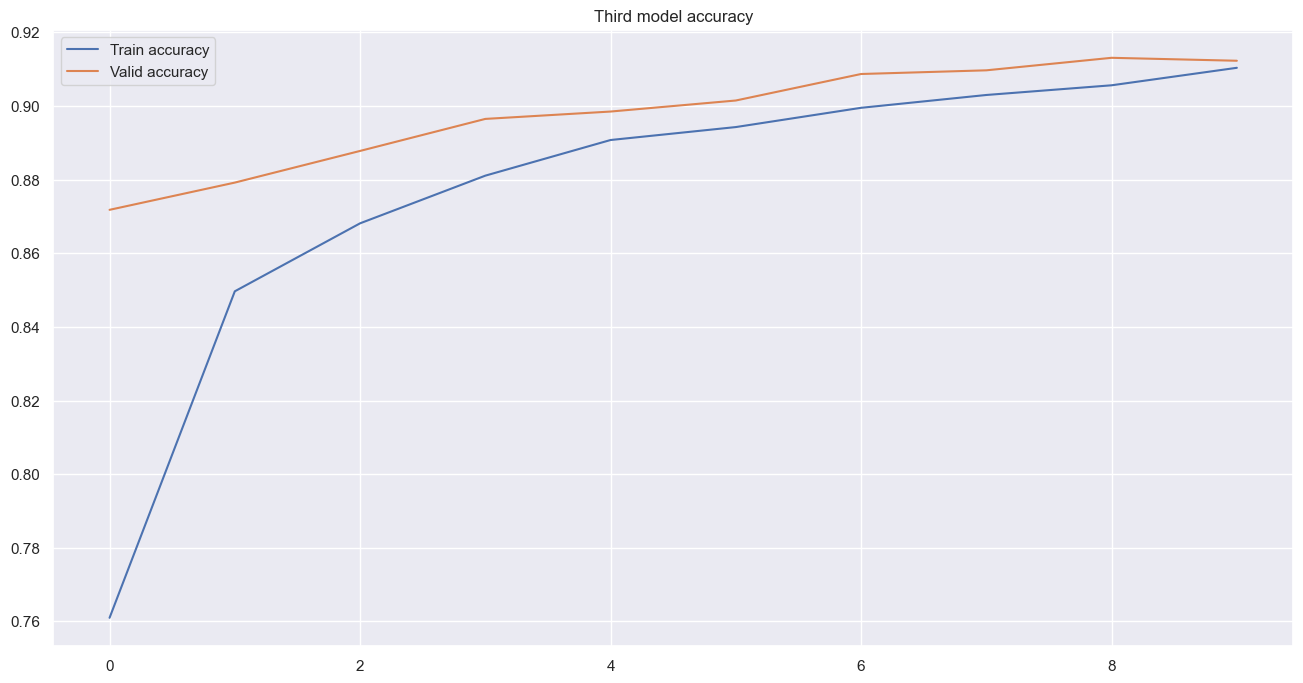

this is my model that i used to work with fashion_mnist

In [ ]:
import torch
import torch.nn as nn

class VAutoEncoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(128 * 6 * 6, latent_dim)
        self.fc_logvar = nn.Linear(128 * 6 * 6, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 6 * 6),
            nn.ReLU(),
            nn.Unflatten(1, (128, 6, 6)),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

        #self.N = torch.distributions.Normal(0, 1)

    def encode(self, x):
        x = self.encoder(x)
        x = torch.flatten(x, start_dim=1)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        y = self.decoder(z)
        return y, mu, logvar

    def process(self, x):
        return self(x)[0]


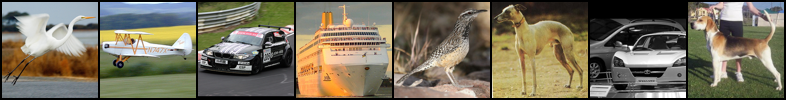

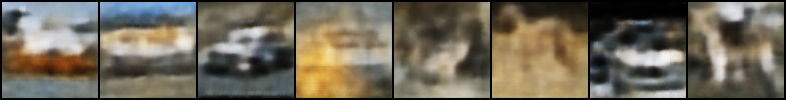

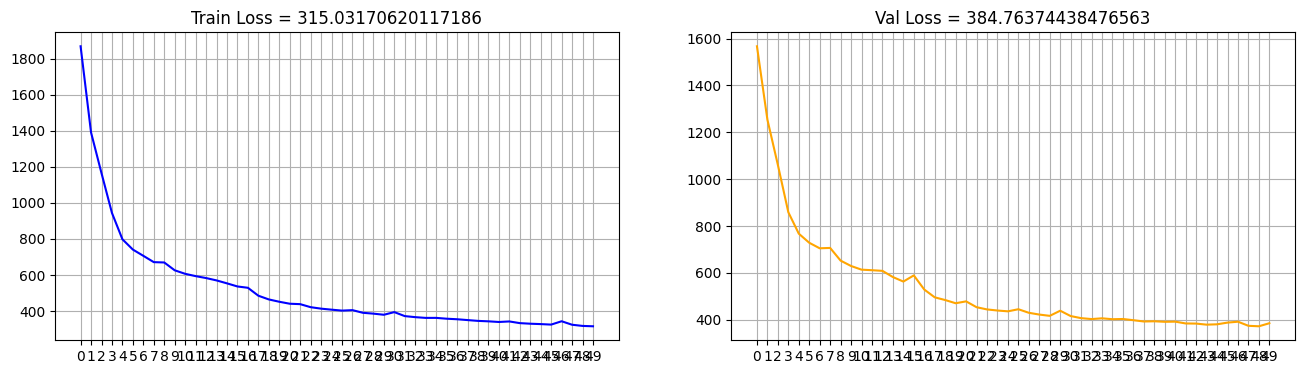

this is the VAE model